In [1]:
import numpy as np
import scipy.linalg
import scipy.io
import scipy.sparse
# from scipy.sparse.linalg import LinearOperator
import matplotlib.pyplot as pl
from PIL import Image
from scipy import spatial, sparse
%matplotlib inline

# Problem 1 (LU decomposition)
## 30 pts

- Find exact number of operations required to calculate the LU decomposition of an arbitrary dense matrix.
- Is it possible to solve 1 000 000 x 1 000 000 dense linear system on your laptop within 1 month via LU decomposition. Assume that $LU$ decomposition is not given.

Significant reduction in complexity can be achieved if the matrix has a certain structure, e.g. it is sparse. 
In the following task we consider an important example of $LU$ for tridiagonal matrices.

- Find number of operations to compute $LU$ decomposition of tridiagonal matrix, taking into account only non-zero elements. How many nonzero elements are in factors $L$ and $U$ and where are they located? Conclude what is the complexity to solve a linear system with tridiagonal matrix.

Some details in lecture proofs about $LU$ were omitted. Let us complete them.
- Prove that if $LU$ decomposition exists, then matrix is strictly regular.
- Prove that if $A$ is strictly regular, then $A_1 = A - \frac 1a b c^T$ (see lectures for notations) is also strictly regular.

In some cases $LU$ decomposition might fail. Hence in practice pivoting strategy is used.
Consider this problems on a simple example of the matrix $A = \begin{pmatrix}
\varepsilon & 1\\
1 & 1
\end{pmatrix}.$ 
* Find analytically $LU$ decomposition with and without pivoting for the matrix $A$.
Why $LU$ without pivoting fails when $\varepsilon$ is small?
* Find condition number of $A$ for $\|\cdot\|_2$. For what $\varepsilon$ this matrix is ill-conditioned?

## Solution

**1)** The first step of LU decomposition

$$\begin{bmatrix}
a_{11} && a_{12} && \ldots && a_{1,n-1} && a_{1n} \\
a_{21} && a_{22} && \ldots && a_{2,n-1} &&a_{2n} \\
\vdots && \vdots && \ddots && \vdots && \vdots \\
a_{n-1,1} && a_{n-1,2} && \ldots && a_{n-1,n-1} &&a_{n-1,n}\\
a_{n1} && a_{n2} && \ldots && a_{n-1,n}&& a_{nn} \\
\end{bmatrix} \rightarrow
\begin{bmatrix}
a_{11} && a_{12} && \ldots && a_{1,n-1} && a_{1n} \\
0 && * && \ldots && * &&* \\
\vdots && \vdots && \ddots && \vdots && \vdots \\
0 && * && \ldots && * &&*\\
0 && * && \ldots && *&& * \\
\end{bmatrix}
$$

We see that we have to make $2n$ multiplications/additions for $n-1$ rows, so we have to make $2n(n-1)$ operations. At the $i$-th step we have to make $2(n-i+1)$ multiplications/additions for $n-i$ rows. So the total number of operations is

$$2\sum_{i=1}^{n-1}(n-i+1)(n-i) = \frac{2}{3}(n^3 - n)$$

But at $i$-th iteration we know about vanishing of $n-i$ elements, so we can avoid this elements. So total number of operations is 

$$\frac{2}{3}(n^3 - n) - \frac{n(n-1)}{2} = \frac{2}{3}n^3 - \frac{1}{2}n^2 - \frac{1}{6}n$$

**2)** I found that my computer can make $7\cdot10^9$ FLOPS. So solving 1 000 000 x 1 000 000 dense linear system on my laptop takes

$$\left(\frac{2}{3}10^{18} - \frac{1}{2}10^{12} - \frac{1}{6}10^6\right)\cdot\frac{1}{7\cdot 10^9}\cdot\frac{1}{60\cdot 60\cdot 24} \approx 1103$$

days. This is more than one month.

**3)** For the first iteration of LU decomposition for tridiagonal matrix

$$\begin{bmatrix}
a_{11} && a_{12} && 0 &&\ldots && \ldots && 0 \\
a_{21} && a_{22} && a_{23} && 0&&\ldots && 0  \\
 0 && a_{32} && \ldots && \ldots&&\ldots&&. \\
. && \ldots && \ldots && \ldots&&\ldots&&. \\
. && \ldots && \ldots && \ldots&&\ldots&&. \\
. && \ldots && \ldots && a_{n-2,n-2}&&a_{n-2,n-1}&&0 \\
0 && 0 && \ldots && a_{n-1, n-2}&&a_{n-1,n-1} &&a_{n-1,n}\\
0 && 0 && \ldots && 0&&a_{n-1,n}&& a_{nn} \\
\end{bmatrix} \rightarrow
\begin{bmatrix}
a_{11} && a_{12} && 0 &&\ldots && \ldots && 0 \\
0 && * && a_{23} && 0&&\ldots && 0  \\
 0 && a_{32} && \ldots && \ldots&&\ldots&&. \\
. && \ldots && \ldots && \ldots&&\ldots&&. \\
. && \ldots && \ldots && \ldots&&\ldots&&. \\
. && \ldots && \ldots && a_{n-2,n-2}&&a_{n-2,n-1}&&0 \\
0 && 0 && \ldots && a_{n-1, n-2}&&a_{n-1,n-1} &&a_{n-1,n}\\
0 && 0 && \ldots && 0&&a_{n-1,n}&& a_{nn} \\
\end{bmatrix}$$

we have to make $3$ operations: one addition and $2$ multiplications. After that we have to make the same operations for tridiagonal matrix $(n-1)\times(n-1)$. So we have to make $4$ operations for $i$-th iteration. Hence, the total amount of operations is $4(n-1)$. It can be easily seen that $L$ consists only of diagonal and upper diagonal elements. $U$ consists only of lower diagonal and diagonal elements, because at $i$-th iteration we add $i$-th row only to $(i+1)$-th one. We see that LU decomposition for tridiagonal matrices is $\mathcal{O}(n)$ and, obviously, solving systems $Ux = y$ and $Lx = \tilde{y}$ are $\mathcal{O}(n)$. So total time is $\mathcal{O}(n)$.

**4)** We know that $A$ is non singular, so $det(L)\neq 0$ and $det(U)\neq 0$. Hence, all elements $L_{ii}$ and $U_{ii}$ are not zero, so all principal minors of matrices $L$ and $U$ are not zero. It can be easily seen principal minors of matrix $A$ are multiplications of principal minors of $L$ and $U$, more precisely

$$A_k = L_k \cdot U_k\neq 0$$

Where $A_k$ is principal minor $k\times k$ of matrix $A$. Hence, matrix $A$ is strictly regular.

**5)** Set

$$A = \begin{bmatrix}
a && c^T\\
b && D
\end{bmatrix}$$

After the first step of Gaussian elimination we obtain

$$A = \begin{bmatrix}
a && c^T\\
b && D
\end{bmatrix}
\rightarrow
\begin{bmatrix}
a && c^T\\
0 && D - \frac{1}{a}b\cdot c^T
\end{bmatrix}$$

We know that principal minors of the left matrix are equal to principal minors of the right matrix. So we see that

$$A_k = a\cdot \left(D - \frac{1}{a}b\cdot c^T\right)_{k-1}$$

Hence, $D - \frac{1}{a}b\cdot c^T$ is also strictly regular.

**6)** $$A = \begin{bmatrix}
\epsilon && 1\\
1 && 1
\end{bmatrix}
$$

After row-pivoting 

$$\tilde{A} = \begin{bmatrix}
1 && 1\\
\epsilon && 1
\end{bmatrix}
$$

LU decompositions for these matrices are

$$A = \begin{bmatrix}
\epsilon && 1\\
1 && 1
\end{bmatrix}=\begin{bmatrix}
1 && 0\\
\epsilon && 1
\end{bmatrix}\cdot\begin{bmatrix}
1 && 1\\
0 && 1-\epsilon
\end{bmatrix}
$$
$$\tilde{A} = \begin{bmatrix}
1 && 1\\
\epsilon && 1
\end{bmatrix}=\begin{bmatrix}
1 && 0\\
\frac{1}{\epsilon} && 1
\end{bmatrix}\cdot\begin{bmatrix}
\epsilon && 1\\
0 && 1-\frac{1}{\epsilon}
\end{bmatrix}
$$

LU without pivoting fails because matrix is not strictly regular. 

We know that when $\epsilon = 1$ matrix $A$ is singular. So we can check that

$$\lim_{\epsilon\rightarrow 1}\ \text{cond}(A) = \infty$$

In [2]:
iteration = 15
epsilon = 0.999


for i in range(iteration):
    A = np.array([[epsilon, 1],[1, 1]])
    print 'cond(A) =', np.linalg.cond(A)
    epsilon = 0.5 * (1 + epsilon)

cond(A) = 3998.00074988
cond(A) = 7998.00037497
cond(A) = 15998.0001875
cond(A) = 31998.0000938
cond(A) = 63998.0000471
cond(A) = 127998.000023
cond(A) = 255998.000013
cond(A) = 511998.000006
cond(A) = 1023997.99991
cond(A) = 2047997.99999
cond(A) = 4095998.00063
cond(A) = 8191998.00323
cond(A) = 16383997.9979
cond(A) = 32767997.9767
cond(A) = 65535998.3136


# Problem 2 (QR decomposition)
## 30 pts

### Standard Gram-Schmidt algorithm (10 pts)
Our goal now is to orthogonalize a system of linearly independent vectors $v_1,\dots,v_n$.
The standard algorithm for the task is the Gram-Schmidt algorithm:
$$
\begin{split}
u_1 &= v_1, \\
u_2 &= v_2 - \frac{(v_2, u_1)}{(u_1, u_1)} u_1, \\
u_3 &= v_3 - \frac{(v_3, u_1)}{(u_1, u_1)} u_1 - \frac{(v_3, u_2)}{(u_2, u_2)} u_2, \\
\dots \\
u_n &= v_n - \frac{(v_n, u_1)}{(u_1, u_1)} u_1 - \frac{(v_n, u_2)}{(u_2, u_2)} u_2 - \dots - \frac{(v_n, u_{n-1})}{(u_{n-1}, u_{n-1})} u_{n-1}.
\end{split}
$$
Now $u_1, \dots, u_n$ are orthogonal vectors in exact arithmetics. Then to get orthonormal system you should divide each of the vectors by its norm: $u_i := u_i/\|u_i\|$.

* Write out what is $Q$ and $R$ obtained in the process described. 


* Implement the described Gram-Schmidt algorithm and check it on a random $100\times 100$ matrix $B$. Print out the error. **Note:** To check orthogonality calculate the matrix of scalar products $G_{ij} = (u_i, u_j)$ (called *Gram matrix*) which should be equal to the identity matrix $I$. Error $\|G - I\|_F$ will show you how far is the system $u_i$ from orthonormal.


* Create a Hilbert matrix $A$ of size $100\times 100$ without using loops.
Othogonalize its columns by the described Gram-Schmidt algorithm. Is the Gram matrix close to the identity matrix in this case? Why?


The observed loss of orthogonality is a problem of this particular algorithm. To avoid it [modified Gram-Schmidt algorithm](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process#Numerical_stability), QR via Householder reflections or Givens rotations can be used.


### Householder QR (20 pts)

Remember that multiplying a vector by a Householder matrix $H$ eliminates all elements but the first one and, thus, Householder transformations are used to compute QR decomposition. We will implement the simple version of the algorithm by successively applying $H_j$ to matrix $A$, where $j$ corresponds to the index of the column we want to zero elements in:
$$H_nH_{n-1}\dots H_1A = R$$

Multiplying the first column of $A$ with a Householder matrix $H_1$ reflects $A_{:,1}$ about a hyperplane given by its normal vector $v_1$. We set $v_1$ equal to $x + \text{sgn}(x_1) \|x\|_2e_1$ so that the reflection is onto the standard basis vector $e_1 =  \begin{bmatrix}1&0&0&\dots\end{bmatrix}^T$. We also need to normalize $v_1$. We thus obtained the key to forming $H_1$. Applying it results in elimination of subdiagonal elements in the first column:
$$ 
    H_1 A = 
    \begin{bmatrix}
        \times & \times & \dots & \times \\ 
        0 & \star & \star & \star \\ 
        0 & \star & \star & \star \\ 
        \dots& \dots&\dots &\dots \\ 
        0 & \star & \star & \star 
    \end{bmatrix}
$$

The second step now involves the submatrix given by $\star$s above. So we would like to apply some $H^\star_2$ to it and zero all the elements but the first two in the second column of $A$. $H^\star_2$ is computed analogously to the first step and then is embedded into 
$$
H_2 = \begin{bmatrix}
        1 & 0 & \dots & 0 \\ 
        0 & H^\star_2 \\
        \dots & \\
        0 &
    \end{bmatrix}
$$

After $n$ steps we will arrive at $R$ and $Q = \Pi_{i=1}^n H_i$.

* Implement Householder QR described above as a function ```householder_qr(A)``` which outputs ```Q,R```. Apply it to the matrix $B$ created above. Print out the error.


* Apply it to the Hilbert matrix $A$ created in the first part of the problem and print out the error. Consider how stable is Householder compared to Gram-Schmidt. 


* Derive the number of operations needed for the Householder QR. Do the same thing for QR via Givens rotations. Compare the constants; which one is faster?

## Solution
### Standard Gram-Schmidt algorithm

**1)** Set $e_i = \frac{u_i}{\|u_i\|}$. Then using expressions for $u_i$ we obtain

$$
\begin{split}
v_1 &= u_1, \\
v_2 &= u_2 + \frac{\langle v_2, u_1 \rangle}{\|u_1\|^2} u_1, \\
v_3 &= u_3 + \frac{\langle v_3, u_1\rangle}{\|u_1\|^2} u_1 + \frac{\langle v_3, u_2\rangle}{\|u_2\|^2} u_2, \\
\dots \\
v_n &= u_n + \frac{\langle v_n, u_1\rangle}{\|u_1\|^2} u_1 + \frac{\langle v_n, u_2\rangle}{\|u_2\|^2} u_2 + \dots + \frac{\langle v_n, u_{n-1}\rangle}{\|u_{n-1}\|^2} u_{n-1}.
\end{split}
$$

In terms of $e_i$

$$
\begin{split}
v_1 &= \langle e_1, v_1\rangle e_1, \\
v_2 &= \langle e_1, v_2\rangle e_1 + \langle e_2, v_2\rangle e_2, \\
v_3 &= \langle e_1, v_3\rangle e_1 + \langle e_2, v_3\rangle e_2 + \langle e_3, v_3\rangle e_3, \\
\dots \\
v_n &= \langle e_1, v_n\rangle e_1 + \ldots + \langle e_n, v_n\rangle e_n.
\end{split}
$$


In matrix form

$$V = [e_1,\ldots, e_n]\cdot
\begin{bmatrix}
\langle e_1, v_1 \rangle && \langle e_1, v_2 \rangle && \ldots && \langle e_1, v_n \rangle \\
0 && \langle e_2, v_2 \rangle && \ldots && \langle e_2, v_n \rangle \\
\vdots && \vdots && \ddots && \vdots\\
0 && 0 && \ldots && \langle e_n, v_n \rangle
\end{bmatrix}$$

Obviously, $Q = [e_1,\ldots, e_n]$ is orthonormal matrix. So this is QR decomposition for matrix $V$.

#### 3) Implementation of Gram-Schmidt algorithm

In [3]:
def GrSch(V):
    (n, n) = V.shape 
    U = np.zeros((n,n))
    # Implementation of Gram-Schmidt algorithm
    for i in range(n):
        U[:, i] = V[:, i] - sum( np.dot(V[:, i], U[:, j]) / np.dot(U[:, j], U[:, j]) * U[:, j] for j in range(i)) 
    for i in range(n):
        U[:, i] = U[:, i] / np.linalg.norm(U[:, i]) 
    return U

def Gram_matrix(U):
    (n, n) = U.shape
    G = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            G[i][j] = np.dot(U[i], U[j])
    return G

In [4]:
np.random.seed(1)
X = np.random.rand(100,100)
GrSch(X)

array([[ 0.07054799,  0.10644051, -0.15356838, ...,  0.01525729,
        -0.02913897,  0.05396577],
       [ 0.05525881,  0.07357179,  0.15498066, ...,  0.01665144,
         0.00925152,  0.08957226],
       [ 0.16074214, -0.0435565 ,  0.10603448, ...,  0.0514178 ,
        -0.07885171, -0.11307006],
       ..., 
       [ 0.04193244, -0.02016476,  0.11659888, ...,  0.14714296,
        -0.00525627, -0.14789501],
       [ 0.16121418, -0.161314  ,  0.14423577, ..., -0.10279198,
        -0.1824309 , -0.06481702],
       [ 0.07397304,  0.14006999,  0.02794801, ..., -0.07953697,
         0.0820682 , -0.01404897]])

In [5]:
n = 100
np.random.seed(1)

# Initialize V and U
B = np.random.rand(n, n)
# Gram-Schmidt
U = GrSch(B)

# Initialize Gram matrix
G = Gram_matrix(U)

print 'Frob norm ||G(B) - I|| =', np.linalg.norm(G - np.identity(n))

Frob norm ||G(B) - I|| = 2.3545916503e-12


**3)** I can just use scipy.linalg.hilbert(n) **:)**

In [6]:
n = 100
I = np.array([range(1, n+1)] * n)
H = 1.0 / (I + I.T - 1)
print 'Hilbert matrix %sx%s:' %(n,n)
print H

print ' '
H_GrSch = GrSch(H)
G = Gram_matrix(H_GrSch)

print 'cond(H) =', np.linalg.cond(H)
print 'Frob norm ||G(H) - I|| =', np.linalg.norm(G - np.identity(n))

Hilbert matrix 100x100:
[[ 1.          0.5         0.33333333 ...,  0.01020408  0.01010101  0.01      ]
 [ 0.5         0.33333333  0.25       ...,  0.01010101  0.01        0.00990099]
 [ 0.33333333  0.25        0.2        ...,  0.01        0.00990099
   0.00980392]
 ..., 
 [ 0.01020408  0.01010101  0.01       ...,  0.00512821  0.00510204
   0.00507614]
 [ 0.01010101  0.01        0.00990099 ...,  0.00510204  0.00507614
   0.00505051]
 [ 0.01        0.00990099  0.00980392 ...,  0.00507614  0.00505051
   0.00502513]]
 
cond(H) = 6.38251409635e+19
Frob norm ||G(H) - I|| = 92.9231068774


**Why?**

I think because of condition number of $H$ is very large.

### Householder QR 
**1)**

In [7]:
def householder(v):
    n = int(v.shape[0])
    V = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            V[i][j] = np.identity(n)[i][j] - 2 * v[i] * v[j]
    return V

In [8]:
def householder_qr(A):
    (n, n) = A.shape
    Q_i = []
    
    for i in range(n-1):
        x = A.T[i][i:]
        e = np.identity(n-i)[0]
        v = x - cmp(x[0], 0) * np.linalg.norm(x) * e
        v = v / np.linalg.norm(v)
        Q_i.append(scipy.linalg.block_diag(np.identity(i), householder(v)))
        A = np.dot(Q_i[i], A)
    
    Q = np.identity(n)
    for i in range(n-1):
        Q = Q.dot(Q_i[i].T)
    
    R = A
    return Q, R

In [9]:
Q, R = householder_qr(B)

G = Gram_matrix(Q)

print 'Frob norm ||G(B) - I|| =', np.linalg.norm(G - np.identity(n))

Frob norm ||G(B) - I|| = 3.00482211998e-14


**2)**

In [10]:
Q, R = householder_qr(H)

G = Gram_matrix(Q)

print 'Frob norm ||G(H) - I|| =', np.linalg.norm(G - np.identity(n))

Frob norm ||G(H) - I|| = 2.98392683181e-14


We see that Householder QR algorithm is much more precise.


**3)** Number of operations.

* Householder QR: case $n\times n$

1) $\|x\|_2$ -- $n$ multiplications, $n-1$ additions, $1$ square root. Total: $2n$ operations

2) $v = x - \text{sgn}(x_1)\cdot\|x\|\cdot e_1$ -- $2$ multiplications, $1$ addition. Also we want to have unit vector $v$, so we need to normalize it, it take us $2n$ operations. Total: $2n+3$ operations

3) $H = I - 2\cdot v\cdot v^T$ -- $2n^2$ multiplications and $n^2$ additions. Total: $3n^2$

So we obtain that on $i$-th step we have $(n-i+1)\times(n-i+1)$ matix and $3(n-i+1)^2 + 2(n-i+1)+3+2(n-i+1) = 3(n-i+1)^2 + 4(n-i+1) + 3$ operations. Summing it from $i=1$ to $n-1$ we obtain

$$\sum_{i=1}^{n-1} \left[3(n-i+1)^2 + 4(n-i+1) + 3\right] = n^3 + \frac{7}{2}n^2+\frac{11}{2}n-10$$

Also we need to multiply matrices $H_i$.

* QR via givens rotations: 

1) To find angle we need $7$ operations.

2) Row updating -- no more that $6n$ operations (exact number depends on the amount of zeros in both rows). 

3) We want $\frac{n(n-1)}{2}$ elements to be zero. Total amount of operations is 

$$\frac{n(n-1)}{2}\cdot(6n+7) = 3n^3+ \frac{1}{2}n^2 -\frac{7}{2}n$$

We see that constant in Givens Rotations algoritm is $3$ times greater than constant in Householder QR. It is worth mentioning that, obviously, for sparse matrices Givens Rotations is much more efficient.

# Problem 3

## 45 pts

### Theoretical tasks (15 pts)

* Prove that for any Hermiatian matrix singular values equal to absolute value of eigenvalues. Does this hold for a general matrix? Prove or give a counterexample.

* Find skeleton decomposition of the matrix $\begin{pmatrix}1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9\end{pmatrix}$.

* Prove that $\|AB\|_F \leq \|A\|_2 \|B\|_F$.


### Eigenfaces (30 pts)

<img src='http://de-bug.de/medien/files/uploads/2009/01/image-eigenfaces.png' width=250>

The aim of this task is to build a face classifier. There are 40 persons in the database. Every person is represented by 10 photos with slightly different facial expression. 
- Download the database of faces [from here](http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html).

- Create training set:

  Import first 9 images for each face ($360$ images). Represent these pictures as a matrix $F$ with $9\times 40$ columns, where each column is a reshaped 2D picture. Note: use `np.reshape` to reshape matrix into a column.
  
  
- Calculate and plot the mean face. Subtract it from each column of the matrix $F$.

- Calculate SVD decomposition of the shifted matrix F and truncate the obtained representaition: $F_r = U_r S_r V_r^T$. 

 Here $U_r$ is a matrix with $r$ columns - basis set in a space of faces. $W_r = S_r V_r^T$ is a matrix of coefficients in the basis $U_r$. Note that now every image is represented as a small number of coefficients in the basis $U_r$.
 
 
- Plot first 4 vectors in $U_r$ using subplots as it is done on the illustration to this problem. Now you know what eigenfaces are =)

- Import testing set which is the rest of photos. Find their coefficients in the basis $U_r$. **Note:** coefficients can be found as a projection onto the columns of $U_r$. 

- Compare the obtained vectors of coefficients to vectors in $W_r$ using cosine similarity and classify testing faces. As an output give indices of faces that were misclassified when $r=5$.

## Solution
**1)** Firstly, if A is a hermitiam matrix then A is diagonalizable

$$A = S^{-1}\Lambda S, \ \Lambda = \text(diag)(\lambda_1,\ldots, \lambda_n)$$

Hence,

$$\sigma_i(A) = \sqrt{\lambda_i(A^*A)} = \sqrt{\lambda_i(A^2)} = \sqrt{\lambda_i(S^{-1}\Lambda SS^{-1}\Lambda S)} = \sqrt{\lambda_i(\Lambda^2)} = \left|\lambda_i(A)\right|$$

It cane be easily seen that if 

$$A = \begin{bmatrix}
0 && 2\\
\frac{1}{2} && 0
\end{bmatrix}$$

Then singular values of matrix A are

$$\sigma_i(A) = \sqrt{\lambda_i(A^*A)} = \sqrt{\lambda_i\left(\begin{bmatrix}
4 && 0\\
0 && \frac{1}{4}
\end{bmatrix}\right)}$$

while eigenvalues are $1$.

**2)** $$\begin{bmatrix}
1 && 2 && 3 \\
4 && 5 && 6 \\
7 && 8 && 9
\end{bmatrix} = \begin{bmatrix}
1 && 2\\
4 && 5\\
7 && 8
\end{bmatrix}\cdot\begin{bmatrix}
1 && 2\\
4 && 5
\end{bmatrix}^{-1}\cdot\begin{bmatrix}
1 && 2 && 3\\
4 && 5 && 6
\end{bmatrix}$$

In [11]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

np.array([[1,2],[4,5],[7,8]]).dot(np.linalg.inv([[1,2],[4,5]]).dot([[1,2,3],[4,5,6]])) == A

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

**3)** Let $A = U\Sigma V^T$. We know that Frobenius norm is unitary invariant, so

$$\|AB\|^2_F = \|U\Sigma V^TB\|^2_F = \|\Sigma V^TB\|_F^2 = \sum_{i,j} \left|\sigma_i(A) \cdot \left[V^TB\right]_{ij}\right|^2\leq \sigma_1(A) \cdot \|V^TB\|_F = \|A\|^2_2\cdot\|B\|^2_F$$

In [2]:
path_to = 'C:/Users/Evgeny/NLA/att_faces/'

In [3]:
img = np.asarray(Image.open('C:/Users/Evgeny/NLA/att_faces/s1/1.pgm'))
img.reshape(-1,1).shape

(10304L, 1L)

In [4]:
# Find an example of face
examp = np.asarray(Image.open('C:/Users/Evgeny/NLA/att_faces/s1/1.pgm'))

# Find shape
(n, m) = examp.shape
length = n * m

training_set = []
folders = []

# path to folders
for i in range(1, 41):
    folders.append(path_to + 's' + str(i) + '/')

# Generating a training set
for i in range(40):
    for j in range(9):
        face = np.asarray(Image.open(folders[i] + str(j+1) + '.pgm'))
        training_set.append(face.reshape(1, length)[0])
        
training_set = np.array(training_set)

F = training_set.T

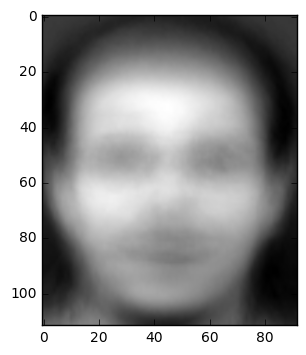

In [5]:
mean_face = np.mean(F, axis=1)

mean_face_img = mean_face.reshape(n, m)

pl.imshow(mean_face_img, cmap='gray')

In [6]:
# Face - Mean_Face
F_shift = F - mean_face.reshape(-1,1)

# SVD decomposition
U, S ,V = np.linalg.svd(F_shift)

In [7]:
# Truncate

r = 5

F_r = U[:, :r].dot(np.diag(S[:r]).dot(V[:r, :]))
W_r = np.diag(S[:r]).dot(V[:r, :])
U_r = U[:, :r].T

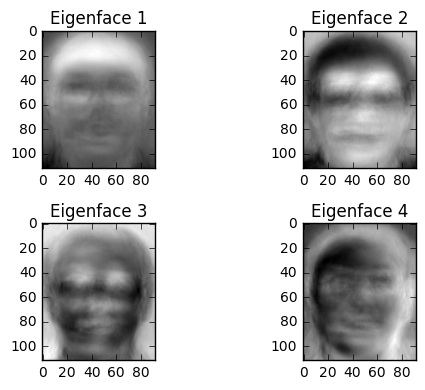

In [8]:
for i in range(4):
    pl.subplot(2, 2, i+1)
    pl.title(("Eigenface %s") % (i+1))
    pl.imshow(U_r[i].reshape(n,m), cmap = 'gray')

pl.tight_layout()

In [9]:
# Generating a testing set
testing_set = []
for i in range(40):
    face = np.asarray(Image.open(folders[i] + str(10) + '.pgm'))
    testing_set.append(face.reshape(1, length)[0])
        
testing_set = np.array(testing_set).T - mean_face.reshape(-1,1)
# testing_set

In [10]:
# Coefficients of testing images in U_r basis

coefficients = np.zeros((r, 40))

for i in range(40):
    for j in range(r):
        coefficients[j][i] = testing_set[:, i].dot(U[:, j])
        


In [11]:
# Comparision matrix 

comparision = np.zeros((40, 360))

for i in range(40):
    for j in range(360):
        comparision[i][j] = coefficients[:, i].dot(W_r[:, j]) / (np.linalg.norm(coefficients[:, i]) * np.linalg.norm(W_r[:, j]))
    
# print comparision

In [12]:
# Find misclassified faces

misclassified_faces = []

for i in range(40):
    pred = list(comparision[i]).index(max(list(comparision[i])))
    if (pred > 9 * (i + 1) - 1) or (9 * i > pred):
        misclassified_faces.append(i+1)
print 'Misclassified faces:', misclassified_faces, '; Amount of misclassified faces =', len(misclassified_faces)

Misclassified faces: [2, 5, 10, 16, 18, 19, 27, 35, 36] ; Amount of misclassified faces = 9


In [13]:
i = 0
j = list(comparision[i]).index(max(list(comparision[i])))
print i, j

0 7


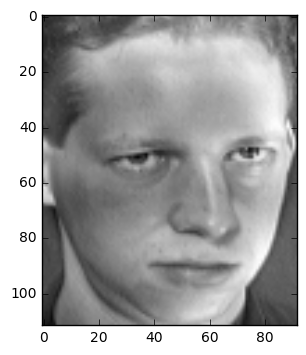

In [14]:
pl.imshow(testing_set.T[i].reshape(n,m), cmap='gray')

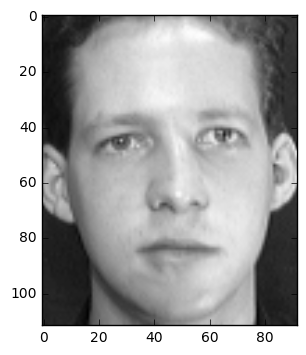

In [15]:
pl.imshow(training_set[j].reshape(n,m), cmap='gray')

# Problem 4 (eigenvalues)

## 55 pts

## Theoretical tasks (15 pts)

* Let $T$ be upper triangular matrix. Prove that $TT^*=T^*T$ iff $T$ is diagonal.

* Prove that normal matrix is Hermitian iff its eigenvalues are real. Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$. 

* The following problem illustrates instability of the Jordan form. Find theoretically eigenvalues of the perturbed Jordan block
$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     & \lambda & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda & 1 \\ 
     \varepsilon & & & & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

## PageRank (30 pts)


#### Damping factor importance

* Write PageRank matrix $A$ that corresponds to the following graph: <img src="graph2.png" width='200'>
What is its largest eigenvalue? What multiplicity does it have?


* Implement the power method for given matrix $A$ and initial guess $x_0$. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of errors $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method conveges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.


* Run the power method for the graph presented above and plot errors $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```. Explain why you observe the absense of convergence. 


In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:
$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$
where $d$ is small parameter (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix which corresponds to the largest eigenvalue has the following interpretation: consider a person who stays in a random node of the graph (i.e. opens a random web page); at each step he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the guy randomly walks through the graph and the eigenvector we are looking for is exactly his stationary distribution — for each node it tells you the probability of visiting this particular node. Therefore if the guy has started from a part of a graph which is not connected with the other part, he will never get there.  In the regularized model the person at each step follows one of the outcoming links with probability $d$ OR visits a random node from the whole graph with probability $(1-d)$.

* Now run the power method with $A_d$ and plot errors $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.99$, ```num_iter=100``` and random initial guess ```x0```.


#### Simple English Wiki

Let us now find the most significant articles on the simple english Wikipedia according to the PageRank model. We provide you with the adjecency matrix of all simple Wikipedia articles (file `simple_wiki_matrix.mat`, matrix can be acessed by the key `'W'`) and the dictionary that maps article id to its name on Wikipedia (file `simple_wiki_dict.pickle`).

* Load the adjecency matrix and the dictionary into Python. Normalize each column of the adjecency matrix to get a matrix from the PageRank model. Check that the obtained matrix is stochastic.
 **Note** that your matrix contains a lot of zeros and therefore is stored in the sparse format. Sparse matrices do not support matrix-vector multiplications via `np.dot(A, x)`. However, they have method `.dot()`, so `A.dot(x)` will work.


* Run power method starting from the vector of all ones and plot errors $\|Ax_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.


* Print names of top-5 articles when $d=0.85$.

## QR algorithm (10 pts)

* Create tridiagonal matrix $A$ = tridiag(1,2,-2) of size $5\times5$. Implement and apply QR algorithm ```QR_alg(A,num_iters)``` to $A$. Use ```plt.spy(A,precision=1e-7)``` to plot the $A_k$ matrix (see lecture notation). Does $A_k$ converge to upper-triangular matrix? How does this correspond to the claim about convergence of QR algorithm?

Make sure you debug your implementation first on $B$ = tridiag($-1,2,-1$) matrix:
<img src=https://pbs.twimg.com/media/Bq6t17OIMAALkiA.jpg width=30%/>

## Solution
**1)**
* If $T$ is diagonal then, obviously, $TT^* = T^*T$
* If $T$ is upper triangular matrix and $TT^* = T^*T$, then

$$\begin{bmatrix}
a_{11} && a_{12} && \ldots && a_{1,n-1} && a_{1n} \\
0 && a_{22} && \ldots && a_{2,n-1} &&a_{2n} \\
\vdots && \ldots && \ldots && \vdots && \vdots\\
\vdots && \ldots && \ldots && \vdots && \vdots\\
0 && 0 && \ldots && a_{n-1,n-1} &&a_{n-1,n}\\
0 && 0 && \ldots && 0&& a_{nn} \\
\end{bmatrix}\cdot\begin{bmatrix}
\overline{a_{11}} && 0 && \ldots && 0 && 0 \\
\overline{a_{12}} && \overline{a_{22}} && \ldots && 0 &&0 \\
\vdots && \ldots && \ldots && \vdots && \vdots \\
\vdots && \ldots && \ldots && \vdots && \vdots\\
\overline{a_{1,n-1}} && \overline{a_{2,n-1}} && \ldots && \overline{a_{n-1,n-1}} &&0\\
\overline{a_{1n}} && \overline{a_{2n}} && \ldots && \overline{a_{n-1,n}}&& \overline{a_{nn}} \\
\end{bmatrix} = $$

$$ = \begin{bmatrix}
\overline{a_{11}} && 0 && \ldots && 0 && 0 \\
\overline{a_{12}} && \overline{a_{22}} && \ldots && 0 &&0 \\
\vdots && \ldots && \ldots && \vdots && \vdots \\
\vdots && \ldots && \ldots && \vdots && \vdots\\
\overline{a_{1,n-1}} && \overline{a_{2,n-1}} && \ldots && \overline{a_{n-1,n-1}} &&0\\
\overline{a_{1n}} && \overline{a_{2n}} && \ldots && \overline{a_{n-1,n}}&& \overline{a_{nn}} \\
\end{bmatrix}\cdot\begin{bmatrix}
a_{11} && a_{12} && \ldots && a_{1,n-1} && a_{1n} \\
0 && a_{22} && \ldots && a_{2,n-1} &&a_{2n} \\
\vdots && \ldots && \ldots && \vdots && \vdots\\
\vdots && \ldots && \ldots && \vdots && \vdots\\
0 && 0 && \ldots && a_{n-1,n-1} &&a_{n-1,n}\\
0 && 0 && \ldots && 0&& a_{nn} \\
\end{bmatrix}$$

We can see that 

$$(TT^*)_{ii} = \sum_{j=i}^n |a_{ij}|^2 = \sum_{j=1}^i |a_{ji}|^2 = (T^*T)_{ii}$$

From the equation for $i=1$ we can see that 

$$\sum_{j=2}^n |a_{1j}|^2 = 0 \Rightarrow a_{1j} = 0,\ 2\leq j\leq n$$ 

From the equation for $i=2$ we can see that 

$$\sum_{j=2}^n |a_{2j}|^2 = |a_{12}|^2 + |a_{22}|^2 =  |a_{22}|^2 \Rightarrow \sum_{j=3}^n |a_{2j}|^2 = 0\Rightarrow a_{2j} = 0,\ 3\leq j\leq n$$ 

The proof of $a_{ij} = 0, \ j>i$ for the remaining elements is the same. So, $T = \text{diag}(a_{11}, \ldots, a_{nn})$.

**2)** We know that $A$ is normal, i.e. $AA^*=A^*A$, and $A$ is hermitian, i.e. $A^*=A$. Let $v$ be an eigenvector with eigenvalue $\lambda$. Then $v$ is an eigenvactor of matrix $A^*$ with eigenvalue $\overline{\lambda}$. So

$$A^2v = AA^*v = \lambda^2 v = |\lambda|^2 v \Rightarrow\ \lambda = \overline{\lambda}$$

Hence, $\lambda\in\mathbb{R}$

Conversly, let $A$ be a normal matrix, s.t. all eigenvalues of matrix $A$ are real. Due to normality $A$ and $A^*$ are diagonalizable in the same basis. So we have 

$$A = U^*DU$$

As all eigenvalues are real then $D^*=D$ and

$A^* = U^*D^*U = U^*DU = A$

Hence, $A$ is an hermitian matrix.

We know that $A$ and $A^*$ are diagonaizable in the same basis. 

$$DD^*=D^*D=I\Leftrightarrow |\lambda_i(D)|=1,\ \forall\ i$$

Hence, normal matrix $A$ is unitary iff all its eigenvalues are unit.

**3)** We want to calculate $\chi_{J(\epsilon)}(x)$. Let us calculate the determinant of 

$$J(\varepsilon)[x] = 
\begin{bmatrix} 
\lambda - x & 1 & & & 0 \\ 
& \lambda - x & 1 & & \\ 
&  & \ddots & \ddots & \\ 
& & & \lambda - x & 1 \\ 
\varepsilon & & & & \lambda - x  \\ 
\end{bmatrix}_{n\times n}
$$

So we see that

$$\chi_{J(\varepsilon)}(x) = (\lambda - x) (\lambda-x)^{n-1} + (-1)^n\epsilon = (\lambda-x)^n + (-1)^n\varepsilon$$

So eigenvalues of pertubated Jordan block are

$$x_i = \lambda + \xi_i,\ \xi_i^n = \varepsilon$$

### PageRank
**1)**

In [26]:
A = np.array([[0, 1, 0, 0, 0],
              [0.5, 0, 0.5, 0, 0],
              [1, 0, 0, 0 ,0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 1, 0]])
A = A.T
# print A
eigenvalues, eigenvectors = np.linalg.eig(A)
print 'Eigenvalues:', eigenvalues
print np.round(eigenvectors, 2)

Eigenvalues: [ 1.0+0.j  -0.5+0.5j -0.5-0.5j  1.0+0.j  -1.0+0.j ]
[[-0.67+0.j    0.35-0.35j  0.35+0.35j  0.00+0.j    0.00+0.j  ]
 [-0.67+0.j   -0.71+0.j   -0.71-0.j    0.00+0.j    0.00+0.j  ]
 [-0.33+0.j    0.35+0.35j  0.35-0.35j  0.00+0.j    0.00+0.j  ]
 [ 0.00+0.j    0.00+0.j    0.00-0.j    0.71+0.j   -0.71+0.j  ]
 [ 0.00+0.j    0.00+0.j    0.00-0.j    0.71+0.j    0.71+0.j  ]]


In [27]:
1 / (-0.5 + 0.5j)

(-1-1j)

Largest eigenvalue is $1$ of multiplicity $2$.

**2)**

In [28]:
def power_method(A, x_0, num_iter):
    errors = []
    x = x_0
    for i in range(1, num_iter):
        x_new = A.dot(x) / np.linalg.norm(A.dot(x))
        lambd = np.dot(A.dot(x_new), x_new)
        errors.append(np.linalg.norm(A.dot(x_new) - lambd * x_new))
        x = x_new
    return x, lambd, errors 

In [29]:
def power_method_d(A, x_0, d, num_iter):
    (N, N) = A.shape
    errors = []
    x = x_0
    dA = d * A
    for i in range(1, num_iter):
        x_new = dA.dot(x) + (1 - d) / N * x.sum() * np.ones(N)
        x_new = x_new / np.linalg.norm(x_new)
        x_next = dA.dot(x_new) + (1 - d) / N * x_new.sum() * np.ones(N)
        lambd = np.dot(x_next, x_new)
        errors.append(np.linalg.norm(x_next - lambd * x_new))
        x = x_new
    return x, lambd, errors

In [30]:
Examp = np.array([[2, -1],[-1, 2]])

x_0 = np.random.rand(2) 
x, l, err = power_method(Examp, x_0, 100)

print 'lambda =', l

lambda = 3.0


**3)**

In [31]:
np.random.seed(4)
x_0 = np.random.rand(5)
x, l, err_A = power_method(A, x_0, 100)

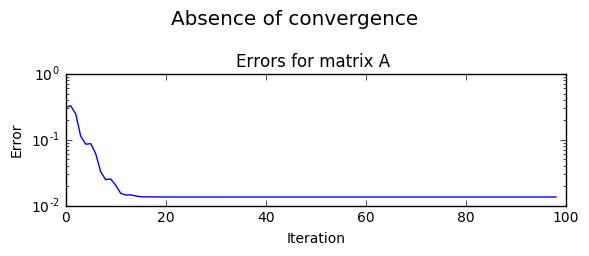

In [32]:
# Plots
fig = pl.figure()
title = fig.suptitle("Absence of convergence", fontsize="x-large")

errplot = fig.add_subplot(2,1,1)
errplot.plot(err_A)
errplot.set_title('Errors for matrix A ')
errplot.set_xlabel('Iteration')
errplot.set_ylabel('Error')
errplot.set_yscale('log')

pl.tight_layout()
fig.subplots_adjust(top=0.82)
pl.show()

Power method for this matrix doesn't converges because our graph is not connected.  But sometimes it converges. Let us took $x_0 = (0.2, 0.2, 0.2, 0.2, 0.2)$.

Also we can look on this situation as a Markov chain. Then eigenvector is stationary distribution and convergence depends on initial guess. Below is an example of convergence.

In [33]:
np.random.seed(4)
x_0 = np.ones(5) * 0.25
x, l, err_A_sp = power_method(A, x_0, 100)

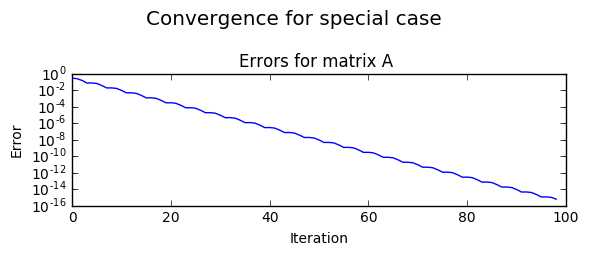

In [34]:
# Plots
fig = pl.figure()
title = fig.suptitle("Convergence for special case", fontsize="x-large")

errplot = fig.add_subplot(2,1,1)
errplot.plot(err_A_sp)
errplot.set_title('Errors for matrix A ')
errplot.set_xlabel('Iteration')
errplot.set_ylabel('Error')
errplot.set_yscale('log')

pl.tight_layout()
fig.subplots_adjust(top=0.82)
pl.show()

In [35]:
d = 0.99
(N, N) = A.shape
A_d = d * A + (1-d) / N * np.ones((N,N))

np.random.seed(1)
x_0 = np.random.rand(N)

x, l, err_A_d = power_method(A_d, x_0, 100)
print 'lambda =', l, '; eigenvactor = ', x

lambda = 0.993754973548 ; eigenvactor =  [ 0.55718163  0.55631691  0.27989664  0.34714659  0.42568444]


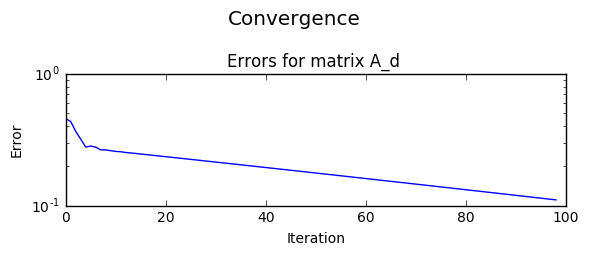

In [36]:
fig = pl.figure()
title = fig.suptitle("Convergence", fontsize="x-large")

errplot = fig.add_subplot(2,1,1)
errplot.plot(err_A_d)
errplot.set_title('Errors for matrix A_d ')
errplot.set_xlabel('Iteration')
errplot.set_ylabel('Error')
errplot.set_yscale('log')

pl.tight_layout()
fig.subplots_adjust(top=0.82)
pl.show()

Indeed, $\lambda_k\rightarrow 1$.

### Wiki

In [37]:
Wiki = np.load('C:\Users\Evgeny\NLA\simple_wiki_dict.pickle')
W = scipy.io.loadmat('C:\Users\Evgeny\NLA\simple_wiki_matrix.mat')

In [38]:
(N, N) = W['W'].shape

# values
dataW = W['W'].data 

# rows
iW= W['W'].indices

# columns
jW = W['W'].indptr

In [39]:
# sum of columns
col_sum = np.array(W['W'].sum(0))[0]

In [40]:
# Create the normalized data

dataW_norm = np.zeros(6872154)
for i in range(162130):
    dataW_norm[jW[i]:jW[i+1]] = dataW[jW[i]:jW[i+1]] * 1.0 / col_sum[i]

In [41]:
W_norm = sparse.csc_matrix((dataW_norm, iW, jW), shape=(N, N))

In [42]:
del W

We see that **W_norm** is stochastic

In [43]:
W_norm.sum(axis=0)

matrix([[ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [44]:
# Power method for W_norm_d
d = 0.85

x_0 = np.ones(162130)
x, l, err_W_norm_d = power_method_d(W_norm, x_0, d, 100)

<function matplotlib.pyplot.show>

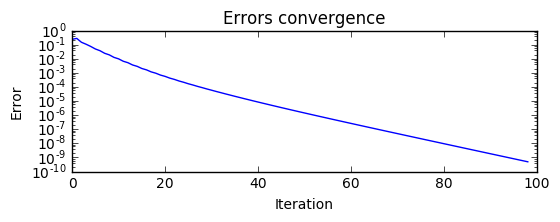

In [45]:
# Eror plot for W_norm_d

fig = pl.figure()

errplot = fig.add_subplot(2,1,1)
errplot.plot(err_W_norm_d)
errplot.set_title('Errors convergence')
errplot.set_xlabel('Iteration')
errplot.set_ylabel('Error')
errplot.set_yscale('log')

pl.show

In [51]:
# find indicies of top-5 values in eigenvector x of W_norm_d

print 'Top 5:'
j = 1
for i in x.argsort()[-5:][::-1]:
    print j, Wiki[i]
    j += 1

Top 5:
1 United_States
2 Multimedia
3 Geographic_coordinate_system
4 France
5 Americans


### Tridiag

In [47]:
A = np.array([[2, -2, 0, 0,0],
              [1, 2, -2, 0, 0],
              [0, 1, 2, -2, 0],
              [0, 0, 1,2,-2],
              [0, 0, 0, 1, 2]])

B = np.array([[2, -1, 0, 0, 0],
              [-1, 2, -1, 0, 0],
              [0, -1, 2, -1, 0],
              [0, 0, -1, 2,-1],
              [0, 0, 0, -1, 2]])

eigenvalues, eigenvectors = np.linalg.eig(A)
print 'Eigenvalues of A :' 
print eigenvalues.reshape(-1,1)

Eigenvalues of A :
[[ 2.+2.44948974j]
 [ 2.-2.44948974j]
 [ 2.+0.j        ]
 [ 2.+1.41421356j]
 [ 2.-1.41421356j]]


In [48]:
def QR_alg(A, num_iter):
    for i in range(num_iter):
        Q_i, R_i = householder_qr(A)
        # Q_i, R_i = np.linalg.qr(A)
        A = R_i.dot(Q_i)
    return A

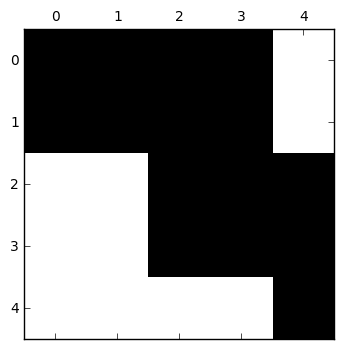

In [49]:
A_k = QR_alg(A, 100)
pl.spy(A_k, precision=1e-7)

We see that **QR_alg** for matrix $A$ doesn't converges to upper-triangular matrix, because matrix $A$ has four complex eigenvalues. In **QR_alg** at all steps we multiplying only real matrices, so we can't obtain complex matrix as a result.

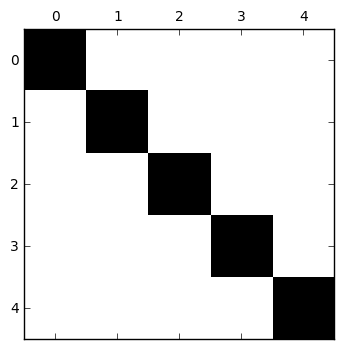

In [50]:
B_k = QR_alg(B, 100)

pl.spy(B_k, precision=1e-7)